In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data from 1st file
# playing around

path = "D:\\Programming\TestData\ex1data1.txt"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


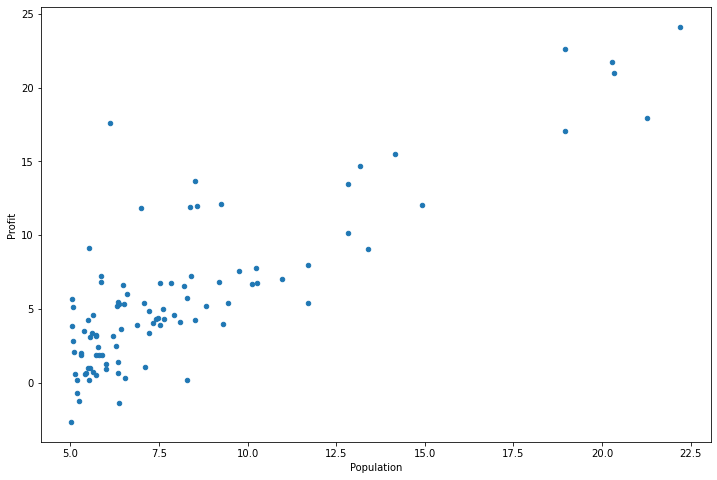

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [24]:
# data from 2nd file
# will run linear regression on this data

path = "D:\\Programming\TestData\ex1data2.txt"
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
# feature normalizing data

#data = (data - data.mean()) / data.std()
#data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [8]:
# add intercept term

#data.insert(0, 'Ones', 1)
#data.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [25]:
# extract matrices X, y from data

cols = data.shape[1]

X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

# X, y -> are still data frames
# X.head(), y.head()

X = np.matrix(X.values)
y = np.matrix(y.values)

print('X = ', X[:10,:])
print('/n')
print('y = ', y[:10,:1])

X =  [[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]]
/n
y =  [[399900]
 [329900]
 [369000]
 [232000]
 [539900]
 [299900]
 [314900]
 [198999]
 [212000]
 [242500]]


In [28]:
X.shape, y.shape

((47, 2), (47, 1))

In [29]:
# feature normalize X

def featureNormalize(X):

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    X_norm = (X - mu)/sigma
    
    return (X_norm, mu, sigma)


In [31]:
# normalize X
print('init X shape = ', X.shape)

X, mu, sigma = featureNormalize(X)

print(X.shape)
print('X = ', X[:5, :])

init X shape =  (47, 2)
(47, 2)
X =  [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


In [48]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [33]:
# One implementation

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [34]:
# add intercept term to X i.e. 1's column to X matrix
TempX = np.insert(X, 0, 1, axis = 1)
X = TempX

print(X[:5, :])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


In [46]:
# alternate implementation

def GradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # assumptions X is (m x n+1), theta is (n+1 x 1) and y is (mx1)
    # n+1 columns since first column of 1s is added to X matrix of n features
    
    # grad descent -> repeat until convergence...
    # theta_j = theta_j - alpha x 1/m x Sum i(1 to m) [(hypothesis_theta - y)] x Xi  
   
    # X is (m, n+1) - 1s column added to original X
    m = X.shape[0]
    
    # confirm y is desired column vector shape - y should be (m,1) and not (m,)
    y = y.reshape((m,1))
    # confirm theta is desired column vector shape - theta should be (n+1,1) and not (n+1,)
    theta = theta.reshape((X.shape[1],1))
    
    J_history = np.zeros((num_iters, 1))
    
    for iters in range(num_iters):
        
        #H -> hypothesis_theta (m,1), same as y
        H = np.matmul(X, theta)
        
        # say Delta is Sum i(1 to m) of [(hypothesis_theta - y)] x Xi 
        
        # since X is (m, n+1) and [H_theta - y] is (m, 1), X' is (n+1, m)
        # so multiplying X' x [H_theta - y] => (n+1, m) x (m,1) = (n+1,1), same as theta
        
        # the vector multiplication involves sum of products hence no need to
        # use the sum function separately 
        Delta = np.matmul(X.transpose(), H-y) # result Delta is a (n+1, 1) vector, like theta
    
        # simultaneously update all theta values by updating theta array elements
        theta = theta - alpha * 1/m * Delta
        
        # Save the new cost J for new theta from every iteration    
        J_history[iters] = computeCost(X, y, theta)
        
        # print out updated theta values and computed cost for upda theta
        # for every iteration  
        print('Iteration number is: ', iters);
        print("\n")
        print('Updated theta are: ', theta);
        print("\n")
        print('Computed cost J_theta for updated theta is: ', J_history[iters])
 
    
    return theta, J_history

In [49]:
# initial theta
theta = np.matrix(np.array([0,0,0]))

alpha = 0.1
iters = 1000

# perform linear regression on the data set
# theta, cost = gradientDescent(X, y, theta, alpha, iters) # one call
theta, cost = GradientDescentMulti(X, y, theta, alpha, iters)   # alternate call

# get the cost (error) of the model
computeCost(X, y, theta)

Iteration number is:  0


Updated theta are:  [[34041.26595745]
 [10576.41334928]
 [ 5470.88217559]]


Computed cost J_theta for updated theta is:  [5.32682599e+10]
Iteration number is:  1


Updated theta are:  [[64678.40531915]
 [19788.83390392]
 [ 9802.4316721 ]]


Computed cost J_theta for updated theta is:  [4.33890843e+10]
Iteration number is:  2


Updated theta are:  [[92251.83074468]
 [27837.4598369 ]
 [13184.96088065]]


Computed cost J_theta for updated theta is:  [3.54574304e+10]
Iteration number is:  3


Updated theta are:  [[117067.91362766]
 [ 34891.81263413]
 [ 15778.5405121 ]]


Computed cost J_theta for updated theta is:  [2.90805547e+10]
Iteration number is:  4


Updated theta are:  [[139402.38822234]
 [ 41095.49819809]
 [ 17717.74155898]]


Computed cost J_theta for updated theta is:  [2.39470789e+10]
Iteration number is:  5


Updated theta are:  [[159503.41535755]
 [ 46570.22630676]
 [ 19115.63645498]]


Computed cost J_theta for updated theta is:  [1.9809573e+10]
It


Computed cost J_theta for updated theta is:  [2.04328504e+09]
Iteration number is:  140


Updated theta are:  [[340412.53929277]
 [109345.96579019]
 [ -6476.52417894]]


Computed cost J_theta for updated theta is:  [2.04328461e+09]
Iteration number is:  141


Updated theta are:  [[340412.55132094]
 [109350.44667428]
 [ -6481.00506238]]


Computed cost J_theta for updated theta is:  [2.04328422e+09]
Iteration number is:  142


Updated theta are:  [[340412.5621463 ]
 [109354.73038474]
 [ -6485.28877228]]


Computed cost J_theta for updated theta is:  [2.04328386e+09]
Iteration number is:  143


Updated theta are:  [[340412.57188911]
 [109358.82559786]
 [ -6489.38398493]]


Computed cost J_theta for updated theta is:  [2.04328353e+09]
Iteration number is:  144


Updated theta are:  [[340412.58065765]
 [109362.74060815]
 [ -6493.29899482]]


Computed cost J_theta for updated theta is:  [2.04328323e+09]
Iteration number is:  145


Updated theta are:  [[340412.58854933]
 [109366.48334512]
 

Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  288


Updated theta are:  [[340412.65957445]
 [109447.66602502]
 [ -6578.22440954]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  289


Updated theta are:  [[340412.65957445]
 [109447.67176501]
 [ -6578.23014953]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  290


Updated theta are:  [[340412.65957445]
 [109447.67725242]
 [ -6578.23563694]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  291


Updated theta are:  [[340412.65957445]
 [109447.68249837]
 [ -6578.24088289]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  292


Updated theta are:  [[340412.65957445]
 [109447.68751348]
 [ -6578.245898  ]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  293


Updated theta are:  [[340412.65957446]
 [109447.69230791]
 [



Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  390


Updated theta are:  [[340412.65957447]
 [109447.79514536]
 [ -6578.35352988]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  391


Updated theta are:  [[340412.65957447]
 [109447.79520364]
 [ -6578.35358816]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  392


Updated theta are:  [[340412.65957447]
 [109447.79525934]
 [ -6578.35364386]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  393


Updated theta are:  [[340412.65957447]
 [109447.7953126 ]
 [ -6578.35369712]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  394


Updated theta are:  [[340412.65957447]
 [109447.79536352]
 [ -6578.35374803]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  395


Updated theta are:  [[340412.65957447]
 [109447.79541219]


 [ -6578.35484633]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  505


Updated theta are:  [[340412.65957447]
 [109447.79646215]
 [ -6578.35484667]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  506


Updated theta are:  [[340412.65957447]
 [109447.79646248]
 [ -6578.354847  ]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  507


Updated theta are:  [[340412.65957447]
 [109447.7964628 ]
 [ -6578.35484732]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  508


Updated theta are:  [[340412.65957447]
 [109447.7964631 ]
 [ -6578.35484762]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  509


Updated theta are:  [[340412.65957447]
 [109447.79646339]
 [ -6578.35484791]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  510


Updated theta are:  [[340412.65957447]

Iteration number is:  585


Updated theta are:  [[340412.65957447]
 [109447.79646944]
 [ -6578.35485396]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  586


Updated theta are:  [[340412.65957447]
 [109447.79646945]
 [ -6578.35485397]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  587


Updated theta are:  [[340412.65957447]
 [109447.79646945]
 [ -6578.35485397]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  588


Updated theta are:  [[340412.65957447]
 [109447.79646946]
 [ -6578.35485398]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  589


Updated theta are:  [[340412.65957447]
 [109447.79646947]
 [ -6578.35485399]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  590


Updated theta are:  [[340412.65957447]
 [109447.79646948]
 [ -6578.354854  ]]


Computed cost J_theta for updated theta is

Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  709


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  710


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  711


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  712


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  713


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  714


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [

Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  827


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  828


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  829


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  830


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  831


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  832


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [

Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  952


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  953


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  954


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  955


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  956


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Computed cost J_theta for updated theta is:  [2.04328005e+09]
Iteration number is:  957


Updated theta are:  [[340412.65957447]
 [109447.79646964]
 [

2043280050.6028287

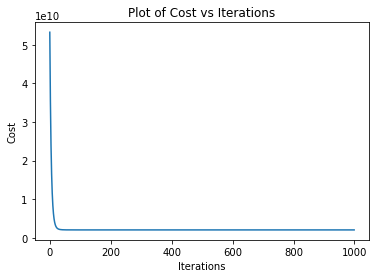

In [52]:
plt.plot(range(iters), cost)

plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.title('Plot of Cost vs Iterations')

plt.show()

In [54]:
# Predicting price based on computed theta
# (estimating yi for given Xi)

# Estimate the price of a 1650 sq-ft, 3 br house
# the first column of X is all-ones. It does not need to be normalized.

Xi = np.matrix(np.array([1, 1650, 3]))               # Xi = [1, 1650, 3]

price = Xi * theta

print(Xi)
print(theta)
print('price = ', price)


[[   1 1650    3]]
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
price =  [[1.80909542e+08]]
